In [ ]:
from google.colab import files
uploaded = files.upload()

Saving VNM.csv to VNM.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import numpy.polynomial.polynomial as poly
import seaborn as sns
from datetime import datetime
from sklearn.utils import column_or_1d
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from keras.models import Sequential
from keras.layers import Dense, GRU, Dropout

In [ ]:
df = pd.read_csv('VNM.csv')
df

,Date,Price,Open,High,Low,Vol.,Change %
0,3/1/2019,"110,654.00","112,611.00","112,611.00","110,654.00",1.04M,0.21%
1,3/4/2019,"111,828.00","110,732.00","112,611.00","110,732.00",1.05M,1.06%
2,3/5/2019,"111,124.00","111,515.00","111,750.00","110,811.00",639.01K,-0.63%
3,3/6/2019,"110,341.00","111,124.00","111,750.00","108,385.00",853.50K,-0.70%
4,3/7/2019,"109,324.00","110,576.00","111,124.00","109,167.00",849.60K,-0.92%
...,...,...,...,...,...,...,...
1310,5/29/2024,"66,300.00","67,000.00","67,300.00","66,000.00",3.36M,-0.75%
1311,5/30/2024,"65,700.00","66,100.00","66,200.00","65,500.00",4.41M,-0.90%
1312,5/31/2024,"65,400.00","65,900.00","65,900.00","65,300.00",4.14M,-0.46%
1313,6/3/2024,"66,100.00","65,800.00","66,600.00","65,700.00",3.19M,1.07%


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315 entries, 0 to 1314
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1315 non-null   object
 1   Price     1315 non-null   object
 2   Open      1315 non-null   object
 3   High      1315 non-null   object
 4   Low       1315 non-null   object
 5   Vol.      1315 non-null   object
 6   Change %  1315 non-null   object
dtypes: object(7)
memory usage: 72.0+ KB


<h1> Tien xu ly du lieu


In [ ]:
df = df.dropna() # Drop missing values
df['Date'] = pd.to_datetime(df['Date'])
df["Price"] = df["Price"].str.replace(',', '').astype(float)

In [ ]:
df1 = df.reset_index()['Price']

In [ ]:
df['Index'] = np.arange(len(df.index))

<h1> Scale du lieu


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

<h1>Split the data into training, testing, and validation sets (7:2:1)

In [ ]:
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

In [ ]:
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

<h1> Create dataset


In [ ]:
#Chuyển mảng giá trị của dataset thành ma trận
def create_dataset(dataset, time_step = 1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   #i=0, X=0,1,2,3...99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
#Reshape into X=t,t+1, t+2... t+99 and Y= t+100
time_step =100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
#Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [ ]:
#Define GRU model
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Fit the model
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 [==============================] - 4s 101ms/step - loss: 0.1237 - val_loss: 0.0212
Epoch 2/100
13/13 [==============================] - 1s 60ms/step - loss: 0.0182 - val_loss: 0.0186
Epoch 3/100
13/13 [==============================] - 1s 59ms/step - loss: 0.0087 - val_loss: 0.0071
Epoch 4/100
13/13 [==============================] - 1s 61ms/step - loss: 0.0060 - val_loss: 0.0118
Epoch 5/100
13/13 [==============================] - 1s 61ms/step - loss: 0.0043 - val_loss: 0.0056
Epoch 6/100
13/13 [==============================] - 1s 85ms/step - loss: 0.0031 - val_loss: 0.0040
Epoch 7/100
13/13 [==============================] - 1s 96ms/step - loss: 0.0022 - val_loss: 0.0024
Epoch 8/100
13/13 [==============================] - 1s 107ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 9/100
13/13 [==============================] - 1s 70ms/step - loss: 0.0014 - val_loss: 8.4884e-04
Epoch 10/100
13/13 [==============================] - 1s 61ms/step - loss: 0.0012 - val_loss: 

<h1> Du bao du lieu test, val

In [ ]:
train_predict = model.predict(X_train)
y_pred = model.predict(X_test)
y_pred_val = model.predict(X_val)

1/1 [==============================] - 0s 30ms/step


In [ ]:
#Chuan hoa du lieu cua y_pred, y_pred_val
train_predict = scaler.inverse_transform(train_predict)
y_pred = scaler.inverse_transform(y_pred)
y_pred_val = scaler.inverse_transform(y_pred_val)

In [ ]:
ytest = scaler.inverse_transform(ytest.reshape(-1,1))
ytest

array([[71055.1],
       [71149.9],
       [70580.7],
       [70580.7],
       [70391. ],
       [70675.6],
       [70485.9],
       [70865.3],
       [70580.7],
       [70580.7],
       [70485.9],
       [69726.9],
       [69062.9],
       [68019.3],
       [69252.6],
       [68303.9],
       [68209.1],
       [67260.4],
       [66880.9],
       [66311.7],
       [67355.3],
       [65932.3],
       [66406.6],
       [65078.5],
       [65268.2],
       [66786.1],
       [67070.7],
       [66880.9],
       [66406.6],
       [66027.1],
       [65457.9],
       [66122. ],
       [65457.9],
       [65647.7],
       [65078.5],
       [64699. ],
       [63560.6],
       [62896.5],
       [63655.5],
       [63655.5],
       [63655.5],
       [63086.3],
       [62706.8],
       [62706.8],
       [62517.1],
       [63086.3],
       [62991.4],
       [62801.7],
       [62137.6],
       [62422.2],
       [64414.4],
       [64129.8],
       [63655.5],
       [62896.5],
       [62706.8],
       [62

In [ ]:
yval = scaler.inverse_transform(yval.reshape(-1,1))
yval

array([[64000.],
       [64200.],
       [64200.],
       [64000.],
       [63500.],
       [64000.],
       [64700.],
       [65000.],
       [65400.],
       [65600.],
       [65800.],
       [68000.],
       [67900.],
       [66600.],
       [66500.],
       [65800.],
       [66500.],
       [67000.],
       [67200.],
       [67000.],
       [66400.],
       [66200.],
       [65800.],
       [67000.],
       [66000.],
       [66100.],
       [66800.],
       [66300.],
       [65700.],
       [65400.],
       [66100.]])

<h1>
Evaluate the accuracy of the algorithm

In [ ]:
#Tính RMSE, MAE, MAPE
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

#MAE
valid_mae = mean_absolute_error(yval,y_pred_val)
test_mae = mean_absolute_error(ytest, y_pred)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

#MAPE
valid_mape = np.mean(np.abs((yval - y_pred_val) / yval))*100
test_mape = np.mean(np.abs((ytest - y_pred) / ytest))*100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation RMSE: 778.0734649675794
Testing RMSE: 967.0505071426757
Validation MAE: 641.3059475806451
Testing MAE: 736.3445216049382
Validation MAPE: 0.9727361932517528
Testing MAPE: 1.0607309978959967


# Du doan co phieu trong 30, 60,90 ngay tiep theo


In [ ]:
x_input=val_data[30:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while i < 90:
    if len(temp_input) > 100:
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1, -1, 1)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = np.array(temp_input)
        x_input = x_input.reshape(1, -1, 1)
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i += 1

0 day input [0.18624646 0.18624646 0.18257135 0.17154416 0.16970474 0.15867756
 0.16602964 0.15316303 0.14948792 0.15684    0.15132548 0.15684
 0.16786719 0.17338171 0.16235267 0.15500059 0.14765037 0.14948792
 0.14948792 0.14765037 0.14948792 0.15867756 0.15684    0.16786719
 0.16051511 0.16051511 0.16051511 0.20462758 0.23954856 0.23219648
 0.22852137 0.2340359  0.22300685 0.22300685 0.24138612 0.24506309
 0.24138612 0.23219648 0.24138612 0.25976724 0.23771101 0.24138612
 0.20462758 0.21014211 0.20462758 0.21933174 0.21381722 0.19892316
 0.18216735 0.18030559 0.1840291  0.19147613 0.18030559 0.1709968
 0.17844383 0.17844383 0.17844383 0.17658207 0.16541153 0.1709968
 0.15982626 0.18775262 0.18216735 0.16541153 0.16541153 0.16168802
 0.1579645  0.15982626 0.12631463 0.10955882 0.11328233 0.11328233
 0.10955882 0.10025003 0.10955882 0.12259112 0.12817639 0.13562342
 0.13934693 0.14307045 0.1840291  0.18216735 0.1579645  0.15610275
 0.14307045 0.15610275 0.16541153 0.16913505 0.16541153

In [ ]:
print(scaler.inverse_transform(lst_output))

[[66034.41722642]
 [66077.94037711]
 [66119.29449366]
 [66159.65853818]
 [66199.38948084]
 [66238.65860333]
 [66277.55154646]
 [66316.11073046]
 [66354.35856602]
 [66392.29265199]
 [66429.91538952]
 [66467.2227767 ]
 [66504.20440857]
 [66540.86028513]
 [66577.18000141]
 [66613.16275704]
 [66648.80214896]
 [66684.09657642]
 [66719.04683978]
 [66753.65133829]
 [66787.90927157]
 [66821.81983924]
 [66855.38464205]
 [66888.60608116]
 [66921.48735808]
 [66954.02607169]
 [66986.2294254 ]
 [67018.09501807]
 [67049.63085353]
 [67080.83693176]
 [67111.71805507]
 [67142.27342306]
 [67172.50703765]
 [67202.42450151]
 [67232.02821578]
 [67261.31738008]
 [67290.301599  ]
 [67318.98007214]
 [67347.35600103]
 [67375.43338759]
 [67403.21623372]
 [67430.70453942]
 [67457.9063085 ]
 [67484.82234136]
 [67511.45263798]
 [67537.80520219]
 [67563.87843322]
 [67589.67873413]
 [67615.2061049 ]
 [67640.46774899]
 [67665.462866  ]
 [67690.19305671]
 [67714.66552453]
 [67738.88106987]
 [67762.844495  ]
 [67786.55

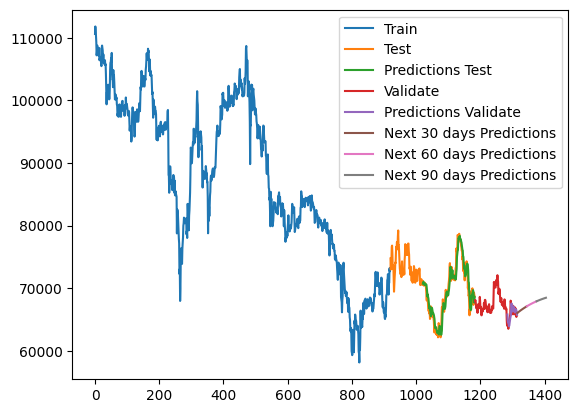

In [ ]:
#Ve hinh
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))

val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)

next_30_days_index = pd.RangeIndex(start=len(df1), stop=len(df1)+30, step=1)
plt.plot(next_30_days_index, scaler.inverse_transform(lst_output[:30]))

next_60_days_index = pd.RangeIndex(start=len(df1)+30, stop=len(df1)+60, step=1)
plt.plot(next_60_days_index, scaler.inverse_transform(lst_output[30:60]))

next_90_days_index = pd.RangeIndex(start=len(df1)+60, stop=len(df1)+90, step=1)
plt.plot(next_90_days_index, scaler.inverse_transform(lst_output[60:]))

plt.legend(['Train','Test','Predictions Test','Validate','Predictions Validate','Next 30 days Predictions','Next 60 days Predictions','Next 90 days Predictions'])

plt.show()

# Split the data into training, testing, and validation sets (6:3:1)

In [ ]:
train_size = int(0.6 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

In [ ]:
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

<h1>Create dataset

In [ ]:
#Chuyển mảng giá trị của dataset thành ma trận
def create_dataset(dataset, time_step = 1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   #i=0, X=0,1,2,3...99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
#Reshape into X=t,t+1, t+2... t+99 and Y= t+100
time_step =100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
#Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [ ]:
#Define GRU model
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Fit the model
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
11/11 [==============================] - 4s 140ms/step - loss: 0.1638 - val_loss: 0.0106
Epoch 2/100
11/11 [==============================] - 1s 107ms/step - loss: 0.0165 - val_loss: 0.0437
Epoch 3/100
11/11 [==============================] - 1s 110ms/step - loss: 0.0086 - val_loss: 0.0108
Epoch 4/100
11/11 [==============================] - 1s 108ms/step - loss: 0.0073 - val_loss: 0.0127
Epoch 5/100
11/11 [==============================] - 1s 66ms/step - loss: 0.0049 - val_loss: 0.0177
Epoch 6/100
11/11 [==============================] - 1s 68ms/step - loss: 0.0043 - val_loss: 0.0112
Epoch 7/100
11/11 [==============================] - 1s 64ms/step - loss: 0.0037 - val_loss: 0.0098
Epoch 8/100
11/11 [==============================] - 1s 61ms/step - loss: 0.0032 - val_loss: 0.0091
Epoch 9/100
11/11 [==============================] - 1s 63ms/step - loss: 0.0027 - val_loss: 0.0066
Epoch 10/100
11/11 [==============================] - 1s 66ms/step - loss: 0.0024 - val_loss: 0.

<h1> Du bao du lieu test, val

In [ ]:
train_predict = model.predict(X_train)
y_pred = model.predict(X_test)
y_pred_val = model.predict(X_val)

1/1 [==============================] - 0s 33ms/step


In [ ]:
#Chuan hoa du lieu cua y_pred, y_pred_val
train_predict = scaler.inverse_transform(train_predict)
y_pred = scaler.inverse_transform(y_pred)
y_pred_val = scaler.inverse_transform(y_pred_val)

In [ ]:
ytest = scaler.inverse_transform(ytest.reshape(-1,1))
ytest

array([[70086.5],
       [70645.7],
       [71670.9],
       [71670.9],
       [71484.5],
       [68968.1],
       [67476.9],
       [66917.7],
       [67756.5],
       [67383.7],
       [66172.1],
       [66078.9],
       [66731.3],
       [65240.1],
       [65053.7],
       [65706.1],
       [65426.5],
       [66731.3],
       [68781.7],
       [68968.1],
       [69061.3],
       [71298.1],
       [71391.3],
       [72230.1],
       [71764.1],
       [68968.1],
       [70832.1],
       [70832.1],
       [73162.1],
       [72696.1],
       [73162.1],
       [74746.5],
       [72975.7],
       [74560.1],
       [74560.1],
       [76610.5],
       [76796.9],
       [75398.9],
       [73068.9],
       [73068.9],
       [73628.1],
       [71764.1],
       [69434.1],
       [70832.1],
       [71764.1],
       [72602.9],
       [74094.1],
       [74000.9],
       [75678.5],
       [76610.5],
       [76144.5],
       [77356.1],
       [77169.7],
       [76796.9],
       [78288.1],
       [79

In [ ]:
yval = scaler.inverse_transform(yval.reshape(-1,1))
yval

array([[64000.],
       [64200.],
       [64200.],
       [64000.],
       [63500.],
       [64000.],
       [64700.],
       [65000.],
       [65400.],
       [65600.],
       [65800.],
       [68000.],
       [67900.],
       [66600.],
       [66500.],
       [65800.],
       [66500.],
       [67000.],
       [67200.],
       [67000.],
       [66400.],
       [66200.],
       [65800.],
       [67000.],
       [66000.],
       [66100.],
       [66800.],
       [66300.],
       [65700.],
       [65400.],
       [66100.]])

<h1>Evaluate the accuracy of the algorithm




In [ ]:
#Tính RMSE, MAE, MAPE
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

#MAE
valid_mae = mean_absolute_error(yval,y_pred_val)
test_mae = mean_absolute_error(ytest, y_pred)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

#MAPE
valid_mape = np.mean(np.abs((yval - y_pred_val) / yval))*100
test_mape = np.mean(np.abs((ytest - y_pred) / ytest))*100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation RMSE: 845.323476338384
Testing RMSE: 1100.8502206267324
Validation MAE: 679.9809727822576
Testing MAE: 865.4832951151876
Validation MAPE: 1.0343207740356182
Testing MAPE: 1.2255057421900473


<h1>Du doan co phieu trong 30 ngay tiep theo

In [ ]:
x_input=val_data[30:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while i < 90:
    if len(temp_input) > 100:
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1, -1, 1)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = np.array(temp_input)
        x_input = x_input.reshape(1, -1, 1)
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i += 1

0 day input [0.18624646 0.18624646 0.18257135 0.17154416 0.16970474 0.15867756
 0.16602964 0.15316303 0.14948792 0.15684    0.15132548 0.15684
 0.16786719 0.17338171 0.16235267 0.15500059 0.14765037 0.14948792
 0.14948792 0.14765037 0.14948792 0.15867756 0.15684    0.16786719
 0.16051511 0.16051511 0.16051511 0.20462758 0.23954856 0.23219648
 0.22852137 0.2340359  0.22300685 0.22300685 0.24138612 0.24506309
 0.24138612 0.23219648 0.24138612 0.25976724 0.23771101 0.24138612
 0.20462758 0.21014211 0.20462758 0.21933174 0.21381722 0.19892316
 0.18216735 0.18030559 0.1840291  0.19147613 0.18030559 0.1709968
 0.17844383 0.17844383 0.17844383 0.17658207 0.16541153 0.1709968
 0.15982626 0.18775262 0.18216735 0.16541153 0.16541153 0.16168802
 0.1579645  0.15982626 0.12631463 0.10955882 0.11328233 0.11328233
 0.10955882 0.10025003 0.10955882 0.12259112 0.12817639 0.13562342
 0.13934693 0.14307045 0.1840291  0.18216735 0.1579645  0.15610275
 0.14307045 0.15610275 0.16541153 0.16913505 0.16541153

In [ ]:
print(scaler.inverse_transform(lst_output))

[[66319.67803126]
 [66518.3799671 ]
 [66715.33787144]
 [66910.71342136]
 [67104.74513056]
 [67297.6010792 ]
 [67489.34849931]
 [67679.98018748]
 [67869.47293263]
 [68057.7899172 ]
 [68244.90072671]
 [68430.77254549]
 [68615.38936593]
 [68798.73678114]
 [68980.80198503]
 [69161.58257646]
 [69341.07615426]
 [69519.28431922]
 [69696.21587553]
 [69871.87642585]
 [70046.27957667]
 [70219.43653335]
 [70391.36170274]
 [70562.06949171]
 [70731.57270638]
 [70899.8945578 ]
 [71067.04144904]
 [71233.04139344]
 [71397.90639673]
 [71561.64846463]
 [71724.2956105 ]
 [71885.86064045]
 [72046.35796134]
 [72205.80998387]
 [72364.23431641]
 [72521.64376509]
 [72678.05433753]
 [72833.48684365]
 [72987.9524888 ]
 [73141.47528443]
 [73294.06323434]
 [73445.7355477 ]
 [73596.51143367]
 [73746.40689988]
 [73895.42674862]
 [74043.59499133]
 [74190.92283337]
 [74337.42468159]
 [74483.11814439]
 [74628.01602788]
 [74772.12473512]
 [74915.46507601]
 [75058.04985668]
 [75199.89188322]
 [75341.00396174]
 [75481.39

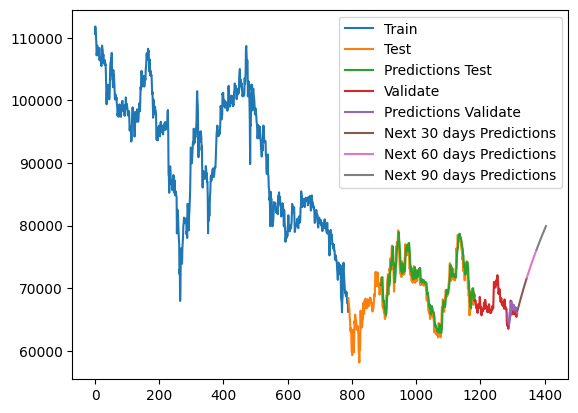

In [ ]:
#Ve hinh
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))

val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)

next_30_days_index = pd.RangeIndex(start=len(df1), stop=len(df1)+30, step=1)
plt.plot(next_30_days_index, scaler.inverse_transform(lst_output[:30]))

next_60_days_index = pd.RangeIndex(start=len(df1)+30, stop=len(df1)+60, step=1)
plt.plot(next_60_days_index, scaler.inverse_transform(lst_output[30:60]))

next_90_days_index = pd.RangeIndex(start=len(df1)+60, stop=len(df1)+90, step=1)
plt.plot(next_90_days_index, scaler.inverse_transform(lst_output[60:]))

plt.legend(['Train','Test','Predictions Test','Validate','Predictions Validate','Next 30 days Predictions','Next 60 days Predictions','Next 90 days Predictions'])

plt.show()

<h1>Split the data into training, testing, and validation sets (5:3:2)

In [ ]:
train_size = int(0.5 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

In [ ]:
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

<h1> Create dataset

In [ ]:
#Chuyển mảng giá trị của dataset thành ma trận
def create_dataset(dataset, time_step = 1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   #i=0, X=0,1,2,3...99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
#Reshape into X=t,t+1, t+2... t+99 and Y= t+100
time_step =100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
#Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [ ]:
#Define GRU model
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Fit the model
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
9/9 [==============================] - 4s 123ms/step - loss: 0.2175 - val_loss: 0.0066
Epoch 2/100
9/9 [==============================] - 1s 66ms/step - loss: 0.0192 - val_loss: 0.0687
Epoch 3/100
9/9 [==============================] - 1s 69ms/step - loss: 0.0168 - val_loss: 0.0257
Epoch 4/100
9/9 [==============================] - 1s 67ms/step - loss: 0.0067 - val_loss: 0.0151
Epoch 5/100
9/9 [==============================] - 1s 69ms/step - loss: 0.0063 - val_loss: 0.0222
Epoch 6/100
9/9 [==============================] - 1s 67ms/step - loss: 0.0045 - val_loss: 0.0280
Epoch 7/100
9/9 [==============================] - 1s 68ms/step - loss: 0.0043 - val_loss: 0.0213
Epoch 8/100
9/9 [==============================] - 1s 71ms/step - loss: 0.0038 - val_loss: 0.0179
Epoch 9/100
9/9 [==============================] - 1s 65ms/step - loss: 0.0036 - val_loss: 0.0187
Epoch 10/100
9/9 [==============================] - 1s 68ms/step - loss: 0.0034 - val_loss: 0.0171
Epoch 11/100
9/9 [

<h1>Du bao du lieu test, val

In [ ]:
train_predict = model.predict(X_train)
y_pred = model.predict(X_test)
y_pred_val = model.predict(X_val)

6/6 [==============================] - 0s 16ms/step


In [ ]:
#Chuan hoa du lieu cua y_pred, y_pred_val
train_predict = scaler.inverse_transform(train_predict)
y_pred = scaler.inverse_transform(y_pred)
y_pred_val = scaler.inverse_transform(y_pred_val)

In [ ]:
ytest = scaler.inverse_transform(ytest.reshape(-1,1))
ytest

array([[73227.2],
       [74082. ],
       [73322.1],
       [73322.1],
       [73417.1],
       [72562.3],
       [72182.4],
       [73702.1],
       [73037.2],
       [68567.1],
       [68116.6],
       [67756.2],
       [66134.4],
       [68026.5],
       [68657.2],
       [72892. ],
       [73612.8],
       [74063.3],
       [72441.4],
       [71450.3],
       [70729.5],
       [69648.3],
       [69197.8],
       [69558.2],
       [68747.3],
       [68927.5],
       [69378. ],
       [68477. ],
       [68116.6],
       [67576. ],
       [68386.9],
       [66224.5],
       [68386.9],
       [67576. ],
       [66945.3],
       [66855.2],
       [65323.4],
       [64963. ],
       [63251.1],
       [63070.9],
       [63611.5],
       [62620.4],
       [59917.4],
       [59557. ],
       [59286.7],
       [63070.9],
       [63341.2],
       [62169.9],
       [61359. ],
       [59737.2],
       [62079.8],
       [64782.8],
       [64242.2],
       [65774. ],
       [65323.4],
       [64

In [ ]:
yval = scaler.inverse_transform(yval.reshape(-1,1))
yval

array([[71244.2],
       [72714.1],
       [72224.1],
       [72910.1],
       [72910.1],
       [73988.1],
       [74282.1],
       [73694.1],
       [73302.1],
       [72420.1],
       [69970.2],
       [70852.2],
       [68794.2],
       [68892.2],
       [67618.3],
       [65658.3],
       [66638.3],
       [66246.3],
       [66638.3],
       [68990.2],
       [69480.2],
       [68598.2],
       [69578.2],
       [69382.2],
       [69970.2],
       [69284.2],
       [68206.3],
       [67324.3],
       [67520.3],
       [69284.2],
       [68892.2],
       [68598.2],
       [67912.3],
       [68108.3],
       [68010.3],
       [67324.3],
       [66932.3],
       [66736.3],
       [67128.3],
       [67030.3],
       [66050.3],
       [67030.3],
       [67422.3],
       [66736.3],
       [67128.3],
       [67030.3],
       [67618.3],
       [68598.2],
       [68010.3],
       [66834.3],
       [67030.3],
       [66736.3],
       [65658.3],
       [65658.3],
       [66736.3],
       [66

<h1>Evaluate the accuracy of the algorithm

In [ ]:
#Tính RMSE, MAE, MAPE
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

#MAE
valid_mae = mean_absolute_error(yval,y_pred_val)
test_mae = mean_absolute_error(ytest, y_pred)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

#MAPE
valid_mape = np.mean(np.abs((yval - y_pred_val) / yval))*100
test_mape = np.mean(np.abs((ytest - y_pred) / ytest))*100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation RMSE: 1133.415978885826
Testing RMSE: 1446.2416123710466
Validation MAE: 921.1642973542937
Testing MAE: 1142.4390038395902
Validation MAPE: 1.3649551608291042
Testing MAPE: 1.6658024577148889


<h1>Du doan co phieu trong 30 ngay tiep theo

In [ ]:
x_input=val_data[30:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while i < 90:
    if len(temp_input) > 100:
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1, -1, 1)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = np.array(temp_input)
        x_input = x_input.reshape(1, -1, 1)
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i += 1

0 day input [0.16496099 0.18792204 0.17202636 0.16672779 0.16496099 0.15083211
 0.16319418 0.17025955 0.19145379 0.20381772 0.21617979 0.20911628
 0.21264803 0.19498554 0.19675235 0.2002841  0.2002841  0.21617979
 0.21794659 0.23384228 0.24267259 0.25503652 0.28506107 0.2956582
 0.26033508 0.26210189 0.2426037  0.24990179 0.28456585 0.27726776
 0.25172631 0.25172631 0.2590244  0.25719988 0.24625275 0.25172631
 0.26084892 0.25537536 0.24807727 0.24442823 0.2590244  0.2809168
 0.28456585 0.33929964 0.3301789  0.33747512 0.33747512 0.37943913
 0.37761461 0.368492   0.37761461 0.368492   0.38308817 0.36119391
 0.36666747 0.368492   0.35754486 0.35754486 0.34659773 0.34112417
 0.33200342 0.33382608 0.30646011 0.31558272 0.28274133 0.27179419
 0.2973375  0.26814515 0.27544324 0.24442823 0.27179419 0.26267158
 0.27544324 0.27544324 0.29551298 0.30098655 0.29003941 0.28274133
 0.26632063 0.22070944 0.23713014 0.19881518 0.2006397  0.17692278
 0.14043234 0.15867756 0.15137947 0.15867756 0.20246

In [ ]:
print(scaler.inverse_transform(lst_output))

[[66681.3784805 ]
 [66997.45077544]
 [67327.46091558]
 [67652.91608403]
 [67972.24353094]
 [68285.47847311]
 [68592.7353651 ]
 [68894.09424507]
 [69189.61194012]
 [69479.32446742]
 [69763.29025482]
 [70041.56052676]
 [70314.21051909]
 [70581.32267112]
 [70842.97301911]
 [71099.26001   ]
 [71350.27728842]
 [71596.12250094]
 [71836.90289869]
 [72072.71452746]
 [72303.66303762]
 [72529.84927726]
 [72751.36929217]
 [72968.33513577]
 [73180.83485003]
 [73388.96768228]
 [73592.82967831]
 [73792.52008543]
 [73988.12214334]
 [74179.73349859]
 [74367.43418933]
 [74551.3186606 ]
 [74731.46214827]
 [74907.95429507]
 [75080.86873612]
 [75250.29191263]
 [75416.29425817]
 [75578.9478071 ]
 [75738.32779528]
 [75894.5126601 ]
 [76047.56162982]
 [76197.54193648]
 [76344.52401366]
 [76488.57189189]
 [76629.7496017 ]
 [76768.11477057]
 [76903.73142902]
 [77036.66200682]
 [77166.94972457]
 [77294.65701204]
 [77419.83669441]
 [77542.54960069]
 [77662.84055225]
 [77780.7607735 ]
 [77896.36148888]
 [78009.68

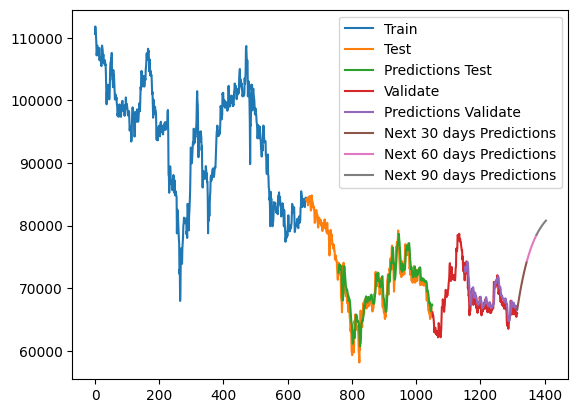

In [ ]:
#Ve hinh
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))

val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)

next_30_days_index = pd.RangeIndex(start=len(df1), stop=len(df1)+30, step=1)
plt.plot(next_30_days_index, scaler.inverse_transform(lst_output[:30]))

next_60_days_index = pd.RangeIndex(start=len(df1)+30, stop=len(df1)+60, step=1)
plt.plot(next_60_days_index, scaler.inverse_transform(lst_output[30:60]))

next_90_days_index = pd.RangeIndex(start=len(df1)+60, stop=len(df1)+90, step=1)
plt.plot(next_90_days_index, scaler.inverse_transform(lst_output[60:]))

plt.legend(['Train','Test','Predictions Test','Validate','Predictions Validate','Next 30 days Predictions','Next 60 days Predictions','Next 90 days Predictions'])

plt.show()